#                                  Investment Assignment

## Checkpoints - part 1

### Checkpoint 1: Data Cleaning 1

In [2]:
# Load the companies and rounds2 datasets
import pandas as pd
file_companies = 'companies.txt'
file_rounds2 = 'rounds2.csv'
file_mapping = 'mapping.csv'
companies = pd.read_csv(file_companies, sep='\t', encoding='ISO-8859-1')
rounds2 = pd.read_csv(file_rounds2, encoding='ISO-8859-1')
# As the data in columns permalink and company_permalink are not same with respect to case-sensitive which leads to 
# none of the values in both columns match. Converting those values to lower case, so majority of the values will match.
companies['permalink']=companies['permalink'].str.lower()
rounds2['company_permalink']=rounds2['company_permalink'].str.lower()
#len(rounds2) #to verify all the rows are read into the dataframe

In [3]:
# To find the unique companies
unique_company_round = len(rounds2['company_permalink'].unique())   
unique_company_count = len(companies['permalink'].unique())
print("Unique companies in rounds2 :", unique_company_round)  # unique companies in rounds2 as per the encoding ISO-8859-1
print("Unique companies in companies file :", unique_company_count) # unique companies as per the encoding ISO-8859-1

# Total record count in companies dataframe
print("Total records in companies dataframe :", len(companies)) 

Unique companies in rounds2 : 66370
Unique companies in companies file : 66368
Total records in companies dataframe : 66368


In [4]:
# To merge companies dataframe with rounds2 used outer join.
master_frame = rounds2.merge(companies, left_on='company_permalink', right_on='permalink', how='outer')
master_frame.shape

(114954, 16)

Observations from the datasets : 
1. There are 5 permalink values which are present in companies dataframe but not in rounds2. 
2. There are 7 company_permalink values which are present in rounds2 but not in companies.

### Checkpoint 2: Funding Type Analysis

In [5]:
# To filter data for venture type and calculate average funding amount
venture_df = master_frame[master_frame['funding_round_type']=="venture"]
venture_df['raised_amount_usd'].mean()

11748949.129489528

In [6]:
# To filter data for angel type and calculate average funding amount
angel_df = master_frame[master_frame['funding_round_type']=="angel"]
angel_df['raised_amount_usd'].mean()

958694.4697530865

In [7]:
# To filter data for seed type and calculate average funding amount
seed_df = master_frame[master_frame['funding_round_type']=="seed"]
seed_df['raised_amount_usd'].mean()

719817.9969071728

In [8]:
# To filter data for private_equity type and calculate average funding amount
private_equity_df = master_frame[master_frame['funding_round_type']=="private_equity"]
private_equity_df['raised_amount_usd'].mean()

73308593.02944215

## Checkpoints - part 2

### Checkpoint 3: Country Analysis

In [9]:
# To find the top9 countries having highest total funding
df1 = master_frame.copy()
df1 = df1[['funding_round_type','raised_amount_usd','country_code']] 
df1 = df1[df1['funding_round_type']=='venture']
df2 = df1.groupby('country_code',as_index=False).sum()
df2 = df2.sort_values(by=['raised_amount_usd'], ascending=False)

In [10]:
# Due to time constraint listed the english speaking countries here
esc = ['AUS','NZL','GBR','USA','ATG','BHS','BRB','BLZ','BWA','BDI','CMR','CAN','COK','DMA','SWZ','FJI','GMB','GHA','GRD','GUY',
'IND','IRL','JAM','KEN','KIR','LSO','LBR','MWI','MLT','MHL','MUS','FSM','NAM','NRU','NGA','NIU','PAK','PLW','PNG','PHL','RWA',
'KNA','LCA','VCT','WSM','SYC','SLE','SGP','SLB','SOM','ZAF','SSD','SDN','TZA','TON','TTO','TUV','UGA','VUT','ZMB','ZWE']

In [11]:
df2 = df2[df2['country_code'].isin(esc)]
top9 = df2.iloc[:9]
top9

,country_code,raised_amount_usd
100,USA,4.225108e+11
31,GBR,2.024563e+10
41,IND,1.439186e+10
13,CAN,9.583332e+09
87,SGP,2.793918e+09
42,IRL,1.676131e+09
3,AUS,1.322935e+09
73,NZL,4.483164e+08
70,NGA,2.454400e+08


Observations : Top3 English speaking countries are USA, GBR and IND.

### Checkpoint 4: Sector Analysis 1

In [12]:
master_frame['primary_sector']=master_frame['category_list'].str.split("|").str[0]

In [13]:
mapping = pd.read_csv(file_mapping)
if 'Blanks' in mapping.columns:
    del mapping['Blanks']

In [14]:
col_list = list(mapping.columns)
col_list.remove('category_list')

In [15]:
for col in col_list:
    mapping[col].replace(1,col,inplace=True)

In [16]:
sectors = mapping.copy()
if 'category_list' in sectors.columns:
    del sectors['category_list']
sectors.replace(0,"",inplace=True)

In [17]:
mapping['main_sector']=sectors['Automotive & Sports'] + sectors['Cleantech / Semiconductors'] + \
                       sectors['Entertainment'] + sectors['Health'] + \
                       sectors['Manufacturing'] + sectors['News, Search and Messaging'] + \
                       sectors['Others'] + sectors['Social, Finance, Analytics, Advertising']
mapping.dropna(inplace=True)
mapping_df = mapping[['category_list', 'main_sector']]

In [18]:
master_frame.shape

(114954, 17)

In [19]:
# Step to merge master frame with mapping to map each primary sector to its main sector
master_frame = master_frame.merge(mapping_df, left_on='primary_sector', right_on='category_list', how='left')

In [20]:
# primary_sector(2nd last column) and main_sector(last column) columns are present in master frame
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,primary_sector,category_list_y,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media,Media,Entertainment
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,Application Platforms,Application Platforms,"News, Search and Messaging"
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,Application Platforms,Application Platforms,"News, Search and Messaging"
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,Apps,Apps,"News, Search and Messaging"
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,Curated Web,Curated Web,"News, Search and Messaging"


In [21]:
master_frame.shape

(114954, 19)

Results for checkpoint 4 : In the master frame "primary_sector" column mapped to its main sector and its named as "main_sector" column.

### Checkpoint 5: Sector Analysis 2

In [22]:
D01 = master_frame[(master_frame['country_code']=='USA') & (master_frame['funding_round_type']=='venture') & (master_frame['raised_amount_usd'].between(5000000, 15000000))]
D02 = master_frame[(master_frame['country_code']=='GBR') & (master_frame['funding_round_type']=='venture') & (master_frame['raised_amount_usd'].between(5000000, 15000000))]
D03 = master_frame[(master_frame['country_code']=='IND') & (master_frame['funding_round_type']=='venture') & (master_frame['raised_amount_usd'].between(5000000, 15000000))]

In [23]:
D1 = D01.copy()
D2 = D02.copy()
D3 = D03.copy()
D1['invest_count'] = D1.groupby(['main_sector'])['main_sector'].transform('count')
D2['invest_count'] = D2.groupby(['main_sector'])['main_sector'].transform('count')
D3['invest_count'] = D3.groupby(['main_sector'])['main_sector'].transform('count')
D1['amount_invested'] = D1.groupby(['main_sector'])['raised_amount_usd'].transform('sum')
D2['amount_invested'] = D2.groupby(['main_sector'])['raised_amount_usd'].transform('sum')
D3['amount_invested'] = D3.groupby(['main_sector'])['raised_amount_usd'].transform('sum')

Expected results : 
1. D1, D2, D3 dataframes are created.
2. All the columns with along with primary sector and main sector are present.
3. The total number of investments for each main sector in a separate column "invest_count" is created.
4. The total amount invested in each main sector in a separate column "amount_invested" is created.

In [24]:
D1.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list_x,...,country_code,state_code,region,city,founded_at,primary_sector,category_list_y,main_sector,invest_count,amount_invested
12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,...,USA,CA,SF Bay Area,Mountain View,01-01-2011,Analytics,NaN,NaN,NaN,NaN
22,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,...,USA,CA,SF Bay Area,Cupertino,01-03-2012,Apps,Apps,"News, Search and Messaging",1563.0,1.379682e+10
103,/organization/128-technology,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,NaN,16-12-2014,11999347.0,/organization/128-technology,128 Technology,http://www.128technology.com/,Service Providers|Technology,...,USA,MA,Boston,Burlington,07-07-2014,Service Providers,Service Providers,Others,2923.0,2.608928e+10
110,/organization/1366-technologies,/funding-round/424129ce1235cfab2655ee81305f7c2b,venture,C,15-10-2013,15000000.0,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,...,USA,MA,Boston,Bedford,01-01-2007,Manufacturing,Manufacturing,Manufacturing,799.0,7.258553e+09
111,/organization/1366-technologies,/funding-round/6d3f3797371956ece035b8478c1441b2,venture,C,09-04-2015,5000000.0,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,...,USA,MA,Boston,Bedford,01-01-2007,Manufacturing,Manufacturing,Manufacturing,799.0,7.258553e+09


In [25]:
D2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list_x,...,country_code,state_code,region,city,founded_at,primary_sector,category_list_y,main_sector,invest_count,amount_invested
401,/organization/365scores,/funding-round/48212f931f542fdef78810bc87aef086,venture,B,29-09-2014,5500000.0,/organization/365scores,365Scores,http://biz.365scores.com,Android|Apps|iPhone|Mobile|Sports,...,GBR,H9,London,London,01-01-2008,Android,Android,"Social, Finance, Analytics, Advertising",98.0,821888357.0
864,/organization/7digital,/funding-round/b5ad7ed7baddd3974bd51403f17dd88f,venture,A,01-01-2008,8468328.0,/organization/7digital,7digital,http://about.7digital.com,Content Creators|Content Delivery|Licensing|Mu...,...,GBR,H9,London,London,01-01-2004,Content Creators,Content Creators,Entertainment,54.0,461511059.0
865,/organization/7digital,/funding-round/eafacfcceb1fbc4fd605f641b603313e,venture,NaN,19-10-2012,10000000.0,/organization/7digital,7digital,http://about.7digital.com,Content Creators|Content Delivery|Licensing|Mu...,...,GBR,H9,London,London,01-01-2004,Content Creators,Content Creators,Entertainment,54.0,461511059.0
942,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,...,GBR,H9,London,London,01-01-2011,Media,Media,Entertainment,54.0,461511059.0
943,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,...,GBR,H9,London,London,01-01-2011,Media,Media,Entertainment,54.0,461511059.0


In [26]:
D3.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list_x,...,country_code,state_code,region,city,founded_at,primary_sector,category_list_y,main_sector,invest_count,amount_invested
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,...,IND,16,Mumbai,Mumbai,NaN,Media,Media,Entertainment,33.0,2.808300e+08
227,/organization/21diamonds-india,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,C,15-11-2012,6369507.0,/organization/21diamonds-india,21Diamonds,http://www.21diamonds.de,E-Commerce,...,IND,10,New Delhi,Gurgaon,01-06-2012,E-Commerce,E-Commerce,Others,109.0,1.007410e+09
1049,/organization/a-little-world,/funding-round/18d98f82ed392b1609975b81f3e8b3fb,venture,B,09-09-2008,6410000.0,/organization/a-little-world,A LITTLE WORLD,http://alittleworld.com,Finance,...,IND,16,Mumbai,Mumbai,02-03-2000,Finance,NaN,NaN,NaN,NaN
2507,/organization/adlabs-imagica,/funding-round/508d3c83daaae9fda3ba6f9682c78f6c,venture,NaN,28-10-2014,8180000.0,/organization/adlabs-imagica,Adlabs Imagica,http://www.adlabsimagica.com,Entertainment|Tourism,...,IND,16,IND - Other,Khopoli,NaN,Entertainment,Entertainment,Entertainment,33.0,2.808300e+08
3457,/organization/agile,/funding-round/cd3dd1c98ce9d0f632d8752163941674,venture,A,01-05-2011,5740000.0,/organization/agile,Agile,http://www.agile-ft.com,Finance|Finance Technology|FinTech|Insurance,...,IND,16,Mumbai,Mumbai,NaN,Finance,NaN,NaN,NaN,NaN


In [27]:
# Total number of investments in D1, D2, D3
print("Total number of investment in Country1 :", len(D1))
print("Total number of investment in Country2 :", len(D2))
print("Total number of investment in Country3 :", len(D3))

Total number of investment in Country1 : 12150
Total number of investment in Country2 : 628
Total number of investment in Country3 : 330


In [28]:
# Total amount of investment in USD
print("Total amount of investment in Country1 :", D1['raised_amount_usd'].sum())
print("Total amount of investment in Country2 :", D2['raised_amount_usd'].sum())
print("Total amount of investment in Country3 :", D3['raised_amount_usd'].sum())

Total amount of investment in Country1 : 108531347515.0
Total amount of investment in Country2 : 5436843539.0
Total amount of investment in Country3 : 2976543602.0


In [29]:
D_1 = D1.copy()
D_2 = D2.copy()
D_3 = D3.copy()
D_1.sort_values('invest_count', inplace=True, ascending=False)
D_1.drop_duplicates(subset ="invest_count", keep = 'first' , inplace = True)
D_2.sort_values('invest_count', inplace=True, ascending=False)
D_2.drop_duplicates(subset ="invest_count", keep = 'first' , inplace = True)
D_3.sort_values('invest_count', inplace=True, ascending=False)
D_3.drop_duplicates(subset ="invest_count", keep = 'first' , inplace = True)

In [30]:
# Top sector interms of total number of investments
print("Top sector in Country1:", D_1['main_sector'].iloc[0])
print("Top sector in Country2:", D_2['main_sector'].iloc[0])
print("Top sector in Country3:", D_3['main_sector'].iloc[0])

Top sector in Country1: Others
Top sector in Country2: Others
Top sector in Country3: Others


In [31]:
# Top 2nd sector interms of total number of investments
print("Top 2nd sector in Country1:", D_1['main_sector'].iloc[1])
print("Top 2nd sector in Country2:", D_2['main_sector'].iloc[1])
print("Top 2nd sector in Country3:", D_3['main_sector'].iloc[1])

Top 2nd sector in Country1: Cleantech / Semiconductors
Top 2nd sector in Country2: Cleantech / Semiconductors
Top 2nd sector in Country3: News, Search and Messaging


In [32]:
# Top 3rd sector interms of total number of investments
print("Top 3rd sector in Country1:", D_1['main_sector'].iloc[2])
print("Top 3rd sector in Country2:", D_2['main_sector'].iloc[2])
print("Top 3rd sector in Country3:", D_3['main_sector'].iloc[2])

Top 3rd sector in Country1: Social, Finance, Analytics, Advertising
Top 3rd sector in Country2: Social, Finance, Analytics, Advertising
Top 3rd sector in Country3: Entertainment


In [33]:
# Total number of investments in top sector
print("Total number of investments in top sector in Country1:", D_1['invest_count'].iloc[0])
print("Total number of investments in top sector in Country2:", D_2['invest_count'].iloc[0])
print("Total number of investments in top sector in Country3:", D_3['invest_count'].iloc[0])

Total number of investments in top sector in Country1: 2923.0
Total number of investments in top sector in Country2: 143.0
Total number of investments in top sector in Country3: 109.0


In [34]:
# Total number of investments in 2nd top sector
print("Total number of investments in 2nd top sector in Country1:", D_1['invest_count'].iloc[1])
print("Total number of investments in 2nd top sector in Country2:", D_2['invest_count'].iloc[1])
print("Total number of investments in 2nd top sector in Country3:", D_3['invest_count'].iloc[1])

Total number of investments in 2nd top sector in Country1: 2297.0
Total number of investments in 2nd top sector in Country2: 127.0
Total number of investments in 2nd top sector in Country3: 52.0


In [35]:
# Total number of investments in 3rd top sector
print("Total number of investments in 3rd top sector in Country1:", D_1['invest_count'].iloc[2])
print("Total number of investments in 3rd top sector in Country2:", D_2['invest_count'].iloc[2])
print("Total number of investments in 3rd top sector in Country3:", D_3['invest_count'].iloc[2])

Total number of investments in 3rd top sector in Country1: 1912.0
Total number of investments in 3rd top sector in Country2: 98.0
Total number of investments in 3rd top sector in Country3: 33.0


In [36]:
# Top sector interms of investment count recieved highest investment from which company for country 1
top1_company_c1 = D1.copy()
top1_company_c1=top1_company_c1[top1_company_c1['main_sector']=='Others']
top1_company_c1.sort_values('raised_amount_usd', inplace=True, ascending=False)
top1_company_c1.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list_x,...,country_code,state_code,region,city,founded_at,primary_sector,category_list_y,main_sector,invest_count,amount_invested
23305,/organization/convio,/funding-round/86649425a2457a013de7dafbd65225c2,venture,D,07-07-2004,15000000.0,/organization/convio,Convio,http://www.convio.com,Software,...,USA,TX,Austin,Austin,01-01-1999,Software,Software,Others,2923.0,2.608928e+10
9213,/organization/avamar-technologies,/funding-round/077e03edbda52d87ec2bf218b47a1c48,venture,NaN,22-09-2004,15000000.0,/organization/avamar-technologies,Avamar Technologies,NaN,Software,...,USA,CA,Anaheim,Irvine,01-01-1999,Software,Software,Others,2923.0,2.608928e+10
32652,/organization/equallogic,/funding-round/c725fa458b51eaa381fcf05870260abb,venture,B,26-03-2003,15000000.0,/organization/equallogic,Equallogic,http://www.equallogic.com,Enterprise Software,...,USA,NH,"Manchester, New Hampshire",Nashua,01-01-1984,Enterprise Software,Enterprise Software,Others,2923.0,2.608928e+10
86355,/organization/schoology,/funding-round/67303adefefefe5e5e572ec1ed199d67,venture,C,24-06-2014,15000000.0,/organization/schoology,Schoology,http://www.schoology.com,Education|Software|Systems,...,USA,NY,New York City,New York,01-05-2009,Education,Education,Others,2923.0,2.608928e+10
85998,/organization/sauce-labs,/funding-round/36b89f086b623a00d91399680233db92,venture,D,05-02-2015,15000000.0,/organization/sauce-labs,Sauce Labs,http://saucelabs.com,Enterprise Software|SaaS|Software|Web Development,...,USA,CA,SF Bay Area,San Francisco,01-08-2008,Enterprise Software,Enterprise Software,Others,2923.0,2.608928e+10


In [37]:
# Top sector interms of investment count recieved highest investment from which company for country 2
top1_company_c2 = D2.copy()
top1_company_c2=top1_company_c2[top1_company_c2['main_sector']=='Others']
top1_company_c2.sort_values('raised_amount_usd', inplace=True, ascending=False)
top1_company_c2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list_x,...,country_code,state_code,region,city,founded_at,primary_sector,category_list_y,main_sector,invest_count,amount_invested
102685,/organization/tribold,/funding-round/36c8164caf2a5283a766e2a85b9d663c,venture,B,22-03-2007,15000000.0,/organization/tribold,Tribold,http://www.tribold.com,Software,...,GBR,H9,London,London,01-01-2003,Software,Software,Others,143.0,1.249124e+09
68638,/organization/notonthehighstreet,/funding-round/1699ed5949d4d06bce01be9da7d9863f,venture,D,21-05-2012,15000000.0,/organization/notonthehighstreet,Notonthehighstreet,http://www.notonthehighstreet.com,E-Commerce,...,GBR,L1,London,Richmond,04-04-2006,E-Commerce,E-Commerce,Others,143.0,1.249124e+09
32366,/organization/environmentiq,/funding-round/75dfc6681d2f93780158aff5fd9efcde,venture,A,06-03-2006,15000000.0,/organization/environmentiq,EnvironmentIQ,NaN,Software,...,GBR,C3,London,Cambridge,01-01-1988,Software,Software,Others,143.0,1.249124e+09
49821,/organization/ip-access,/funding-round/4321163564fddf7a26b7235d7c791941,venture,NaN,12-12-2011,15000000.0,/organization/ip-access,ip.access,http://www.ipaccess.com,Software,...,GBR,C6,Camborne,Camborne,01-01-2000,Software,Software,Others,143.0,1.249124e+09
9921,/organization/azure-solutions,/funding-round/adb99f479490e33281ab358ba9da2b29,venture,NaN,16-06-2005,15000000.0,/organization/azure-solutions,Azure Solutions,http://www.azuresolutions.com,Software,...,GBR,H9,London,London,NaN,Software,Software,Others,143.0,1.249124e+09


In [38]:
# Top sector interms of investment count recieved highest investment from which company for country 3
top1_company_c3 = D3.copy()
top1_company_c3=top1_company_c3[top1_company_c3['main_sector']=='Others']
top1_company_c3.sort_values('raised_amount_usd', inplace=True, ascending=False)
top1_company_c3.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list_x,...,country_code,state_code,region,city,founded_at,primary_sector,category_list_y,main_sector,invest_count,amount_invested
56021,/organization/limeroad,/funding-round/8fb89dd64b186869e4fc63d83366eb12,venture,B,05-05-2014,15000000.0,/organization/limeroad,LimeRoad,http://www.limeroad.com,E-Commerce|Social Media,...,IND,10,New Delhi,Gurgaon,01-01-2012,E-Commerce,E-Commerce,Others,109.0,1.007410e+09
20273,/organization/classteacher-learning-systems,/funding-round/8be54e916f26b7702504530e6719305f,venture,NaN,27-06-2011,15000000.0,/organization/classteacher-learning-systems,Classteacher Learning Systems,http://www.classteacher.com,EdTech|Education,...,IND,10,New Delhi,Gurgaon,01-01-1999,EdTech,EdTech,Others,109.0,1.007410e+09
108745,/organization/voylla-retail-pvt-ltd,/funding-round/e75b35919cefc102295d2be82651c6a2,venture,B,05-10-2015,15000000.0,/organization/voylla-retail-pvt-ltd,Voylla Retail Pvt. Ltd.,http://www.voylla.com,E-Commerce,...,IND,19,Bangalore,Bangalore,01-05-2012,E-Commerce,E-Commerce,Others,109.0,1.007410e+09
98508,/organization/tejas-networks-india,/funding-round/ca35a0fd045367f9b501a9a433e2c907,venture,C,06-01-2005,15000000.0,/organization/tejas-networks-india,Tejas Networks India,http://www.tejasnetworks.com,Web Hosting,...,IND,19,Bangalore,Bangalore,01-01-2000,Web Hosting,Web Hosting,Others,109.0,1.007410e+09
84702,/organization/roposo,/funding-round/0f647fc9ce894a49ec19697b6ab4deab,venture,B,17-08-2015,15000000.0,/organization/roposo,Roposo,http://www.roposo.com/,E-Commerce|Fashion,...,IND,10,New Delhi,Gurgaon,01-01-2012,E-Commerce,E-Commerce,Others,109.0,1.007410e+09


Observation for Table - 5.1 sl.no 9 : Top companies are more than 1 for the C1, C2, C3 countries from the top sector count wise.

In [39]:
# 2nd Top sector interms of investment count recieved highest investment from which company for country 1
top2_company_c1 = D1.copy()
top2_company_c1=top2_company_c1[top2_company_c1['main_sector']=='Cleantech / Semiconductors']
top2_company_c1.sort_values('raised_amount_usd', inplace=True, ascending=False)
top2_company_c1.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list_x,...,country_code,state_code,region,city,founded_at,primary_sector,category_list_y,main_sector,invest_count,amount_invested
77988,/organization/prestwick-pharmaceuticals-inc,/funding-round/87d080c3134141ce6dc7beb49c9a6550,venture,A,19-06-2003,15000000.0,/organization/prestwick-pharmaceuticals-inc,"Prestwick Pharmaceuticals, Inc.",NaN,Bio-Pharm|Biotechnology|Pharmaceuticals,...,USA,DC,"Washington, D.C.",Washington,NaN,Bio-Pharm,Bio-Pharm,Cleantech / Semiconductors,2297.0,2.118100e+10
16949,/organization/cara-therapeutics,/funding-round/55507f796c1c2519f5c721d8657e7997,venture,D,21-07-2010,15000000.0,/organization/cara-therapeutics,Cara Therapeutics,http://www.caratherapeutics.com,Biotechnology|Health Care,...,USA,CT,Hartford,Shelton,NaN,Biotechnology,Biotechnology,Cleantech / Semiconductors,2297.0,2.118100e+10
17062,/organization/cardiac-dimensions,/funding-round/09a7b10f9ff9cbcbffeedf36166d6be8,venture,NaN,17-03-2004,15000000.0,/organization/cardiac-dimensions,Cardiac Dimensions,http://www.cardiacdimensions.com,Biotechnology|Health Care|Medical Devices,...,USA,WA,Seattle,Kirkland,01-01-2001,Biotechnology,Biotechnology,Cleantech / Semiconductors,2297.0,2.118100e+10
7216,/organization/aratana-therapeutics,/funding-round/2b606a5877b0042896e24ec978a38578,venture,B,07-12-2011,15000000.0,/organization/aratana-therapeutics,Aratana Therapeutics,http://www.aratanatherapeutics.com,Biotechnology|Health Care,...,USA,KS,Kansas City,Kansas City,01-01-2010,Biotechnology,Biotechnology,Cleantech / Semiconductors,2297.0,2.118100e+10
97995,/organization/taris-biomedical,/funding-round/f047a23d49a911cf222185cc32d0fce8,venture,A,25-06-2009,15000000.0,/organization/taris-biomedical,TARIS Biomedical,http://www.tarisbiomedical.com,Biotechnology,...,USA,MA,Boston,Lexington,01-01-2008,Biotechnology,Biotechnology,Cleantech / Semiconductors,2297.0,2.118100e+10


In [40]:
# 2nd Top sector interms of investment count recieved highest investment from which company for country 2
top2_company_c2 = D2.copy()
top2_company_c2=top2_company_c2[top2_company_c2['main_sector']=='Cleantech / Semiconductors']
top2_company_c2.sort_values('raised_amount_usd', inplace=True, ascending=False)
top2_company_c2.head(3)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list_x,...,country_code,state_code,region,city,founded_at,primary_sector,category_list_y,main_sector,invest_count,amount_invested
5575,/organization/anadigm,/funding-round/d66a723ef94efb39e450f62b6df312c4,venture,C,02-10-2003,15000000.0,/organization/anadigm,Anadigm,http://www.anadigm.com/,Semiconductors|Technology,...,GBR,Z7,GBR - Other,Crewe,NaN,Semiconductors,Semiconductors,Cleantech / Semiconductors,127.0,1.136905e+09
31106,/organization/elixent,/funding-round/11039f250826f795bfb1939629708907,venture,C,06-04-2005,15000000.0,/organization/elixent,Elixent,https://www.elixent.com,Semiconductors,...,GBR,B7,Bristol,Bristol,01-01-2000,Semiconductors,Semiconductors,Cleantech / Semiconductors,127.0,1.136905e+09
70789,/organization/onyvax,/funding-round/bdf9dcf603552c6bab9cb9812ec5c099,venture,C,08-05-2006,14906222.0,/organization/onyvax,Onyvax,http://www.onyvax.com,Biotechnology,...,GBR,M3,Bradford,Bradford,NaN,Biotechnology,Biotechnology,Cleantech / Semiconductors,127.0,1.136905e+09


In [41]:
# 2nd Top sector interms of investment count recieved highest investment from which company for country 3
top2_company_c3 = D3.copy()
top2_company_c3=top2_company_c3[top2_company_c3['main_sector']=='News, Search and Messaging']
top2_company_c3.sort_values('raised_amount_usd', inplace=True, ascending=False)
top2_company_c3.head(2)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list_x,...,country_code,state_code,region,city,founded_at,primary_sector,category_list_y,main_sector,invest_count,amount_invested
62908,/organization/mobile2win-india,/funding-round/50396c66ef239f1d5afea76ca98a76c4,venture,NaN,13-11-2006,15000000.0,/organization/mobile2win-india,Mobile2Win India,http://www.mobile2win.com,Mobile,...,IND,16,Mumbai,Mumbai,NaN,Mobile,Mobile,"News, Search and Messaging",52.0,433834545.0
44219,/organization/hike,/funding-round/8555dec0ba4fd695a52f9d42f7f1b3a6,venture,B,31-03-2014,14000000.0,/organization/hike,hike,http://get.hike.in,Messaging|Mobile,...,IND,7,New Delhi,New Delhi,12-12-2012,Messaging,Messaging,"News, Search and Messaging",52.0,433834545.0


Observation  for Table - 5.1 sl.no 10 : Top companies are more than 1 for the C1, C2 countries from the 2nd top sector count wise.

### Checkpoint 6: Plots

In [42]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [43]:
df_plt1 = master_frame.copy()

In [44]:
df_plt1 = df_plt1[['funding_round_type', 'raised_amount_usd']]
df_plt1.dropna(inplace=True)
df_plt1.sort_values('funding_round_type', inplace=True, ascending=False)
df_plt2 = df_plt1.copy()
df_plt2['invest_count']= df_plt2.groupby(['funding_round_type'])['funding_round_type'].transform('count')
#df_plt2.head()

In [45]:
df_plt2=df_plt2.groupby('funding_round_type', as_index=False).mean()
ft = ['angel','seed','venture','private_equity']
df_plt2 = df_plt2[df_plt2['funding_round_type'].isin(ft)]
df_plt2['raised_amount_usd'] = df_plt2['raised_amount_usd'].astype('int64')
df_plt2

,funding_round_type,raised_amount_usd,invest_count
0,angel,958694,4860
8,private_equity,73308593,1936
11,seed,719817,23603
13,venture,11748949,50228


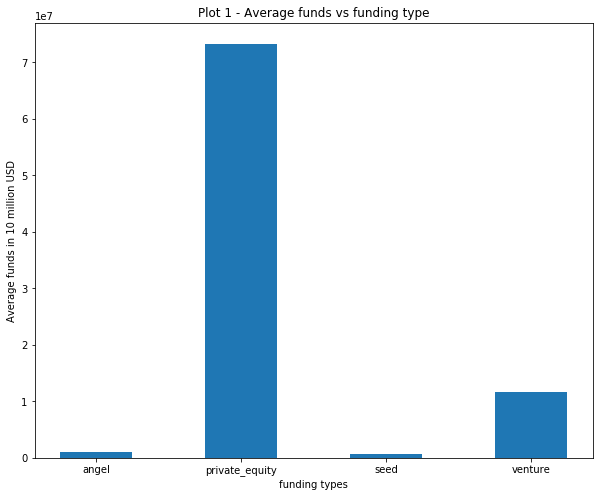

In [46]:
plt.figure(figsize=(10,8))
plt.bar(df_plt2.funding_round_type,df_plt2.raised_amount_usd,width=0.5)
plt.title("Plot 1 - Average funds vs funding type")
plt.xlabel('funding types') 
plt.ylabel('Average funds in 10 million USD')
plt.show()

Observation : Venture is the funding type among the given 4 funding types which has the range of 5 to 15M USD.

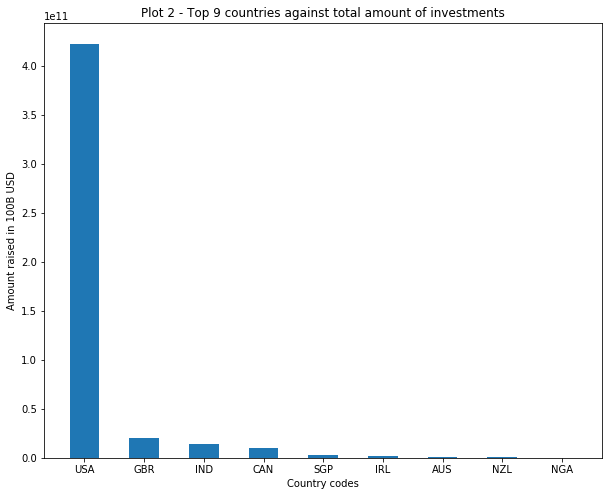

In [53]:
plt.figure(figsize=(10,8))
plt.bar(top9.country_code,top9.raised_amount_usd,width=0.5)
plt.title("Plot 2 - Top 9 countries against total amount of investments")
plt.xlabel('Country codes') 
plt.ylabel('Amount raised in 100B USD')
plt.show()

In [48]:
investments=[]
for i in range(4):
    lis = []
    lis.append(np.log(D_1['invest_count'].iloc[i]))
    lis.append(np.log(D_2['invest_count'].iloc[i]))
    lis.append(np.log(D_3['invest_count'].iloc[i]))
    investments.append(lis)
    
sect = []
for i in range(3):
    lis = []
    lis.append(D_1['main_sector'].iloc[i])
    lis.append(D_2['main_sector'].iloc[i])
    lis.append(D_3['main_sector'].iloc[i])
    sect.append(lis)

In [49]:
# As we cannot have all the names of in the plot listed below top 3 sectors for top 3 countries
for i in range(3):
    print("Top 3 Sectors for top country",i+1," : ")
    for j in sect[i]:
        print(j)
    print("\n")

Top 3 Sectors for top country 1  : 
Others
Others
Others


Top 3 Sectors for top country 2  : 
Cleantech / Semiconductors
Cleantech / Semiconductors
News, Search and Messaging


Top 3 Sectors for top country 3  : 
Social, Finance, Analytics, Advertising
Social, Finance, Analytics, Advertising
Entertainment




<Figure size 1080x576 with 0 Axes>

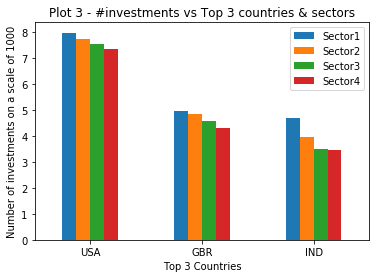

In [50]:
plt.figure(figsize=(15,8))
c=['USA','GBR', 'IND']
data = pd.DataFrame({'Sector1' : investments[0],'Sector2': investments[1], 'Sector3': investments[2], 'Sector4': investments[3]}, index=c)
data.plot.bar(rot=0)
plt.xlabel('Top 3 Countries') 
plt.ylabel('Number of investments on a scale of 1000')
plt.title("Plot 3 - #investments vs Top 3 countries & sectors")
plt.show()

For simplicity I have shown the top4 sectors among them the top3 are clearly visible and the names of the sectors are given in the above cell result.